In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
import datetime



In [52]:
data=pd.DataFrame(pd.read_json('data\db.json'))
pd.reset_option('^display.', silent=True)

In [53]:
data=data.sort_values(by='timestamp', ascending=True)
data=data.where(data['duration']==900)
data=data.drop(labels='duration', axis=1)
data

,timestamp,devices,http_using
0,2022-01-09 20:45:01+01:00,"{'handy': {'total_count': 498, 'total_size': 1...",[]
1,2022-01-09 21:00:01+01:00,"{'handy': {'total_count': 705, 'total_size': 2...",[]
2,2022-01-09 21:15:01+01:00,"{'handy': {'total_count': 6093, 'total_size': ...",[123.35.104.34.bc.googleusercontent.com]
3,2022-01-09 21:30:01+01:00,"{'handy': {'total_count': 1146, 'total_size': ...",[]
4,2022-01-09 21:45:01+01:00,"{'handy': {'total_count': 2400, 'total_size': ...","[par10s21-in-f14.1e100.net, mil02s06-in-f14.1e..."
...,...,...,...
334,2022-01-14 11:00:01+01:00,"{'laptop': {'total_count': 103078, 'total_size...","[par10s21-in-f14.1e100.net, 192.168.1.32, a23-..."
332,2022-01-14 11:15:01+01:00,"{'laptop': {'total_count': 124687, 'total_size...","[par10s21-in-f206.1e100.net, par10s21-in-f14.1..."
336,2022-01-14 11:30:01+01:00,"{'laptop': {'total_count': 290108, 'total_size...","[par10s21-in-f14.1e100.net, 192.168.1.32, edge..."
335,2022-01-14 11:45:01+01:00,"{'laptop': {'total_count': 57227, 'total_size'...","[par10s21-in-f206.1e100.net, par10s21-in-f14.1..."


Accumulated results for the number of packets and their size are summarized for each interval. The data characteristic to separate devices are being transfered to the global table. 


In [54]:
data['acc_count']=0
data['acc_size']=0
data['num_devices']=0
#iterating over all timestamps
for record in range(data.shape[0]) :
    #transpose so that rows represent different devices
    stamp=pd.DataFrame(data.iloc[record]['devices']).transpose()
    num_devices=stamp.shape[0]
    data.at[record,'num_http']= len(data.iloc[record]['http_using'])
    data.at[record, 'num_devices']=num_devices
    #iterating over all devices
    for device in range(num_devices):
        data.at[record,'acc_count']+=stamp.iloc[device]['total_count']
        data.at[record,'acc_size']+=stamp.iloc[device]['total_size']
        device_name=stamp.iloc[device].name
        data.at[record,(device_name +"_total_count")]=stamp.iloc[device]['total_count']
        data.at[record,(device_name +"_total_size")]=stamp.iloc[device]['total_size']
        data.at[record,(device_name +"_perc_out_ipv4")]=stamp.iloc[device]['total_out_ipv4_count']/stamp.iloc[device]['total_count']
        data.at[record,(device_name +"_perc_in_ipv4")]=stamp.iloc[device]['total_in_ipv4_count']/stamp.iloc[device]['total_count']
        data.at[record,(device_name +"_perc_encr")]=stamp.iloc[device]['total_enc_count']/stamp.iloc[device]['total_count']
    del stamp
    
#dropping columns connected to some noise in the data
data=data.drop(labels={'unknown_perc_in_ipv4','unknown_perc_out_ipv4','unknown_perc_encr','unknown_total_count','unknown_total_size'}, axis=1)

data.tail(10)


,timestamp,devices,http_using,acc_count,acc_size,num_devices,num_http,handy_total_count,handy_total_size,handy_perc_out_ipv4,...,laptop_total_count,laptop_total_size,laptop_perc_out_ipv4,laptop_perc_in_ipv4,laptop_perc_encr,tv_total_count,tv_total_size,tv_perc_out_ipv4,tv_perc_in_ipv4,tv_perc_encr
328,2022-01-14 09:45:01+01:00,{},[],1779,555348,3,4.0,565.0,211384.0,0.479646,...,1199.0,339250.0,0.491243,0.432027,1.0,NaN,NaN,NaN,NaN,NaN
343,2022-01-14 10:00:01+01:00,"{'unknown': {'total_count': 90, 'total_size': ...","[waw02s18-in-f3.1e100.net, sof01s12-in-f3.1e10...",6652,2655706,3,6.0,3305.0,1479993.0,0.476248,...,3346.0,1175643.0,0.439331,0.471907,1.0,NaN,NaN,NaN,NaN,NaN
329,2022-01-14 10:15:01+01:00,"{'laptop': {'total_count': 107593, 'total_size...","[waw07s02-in-f14.1e100.net, par10s21-in-f14.1e...",9,1206,3,0.0,7.0,1012.0,0.000000,...,1.0,87.0,1.000000,0.000000,1.0,NaN,NaN,NaN,NaN,NaN
330,2022-01-14 10:30:01+01:00,"{'laptop': {'total_count': 80870, 'total_size'...","[192.168.1.32, par10s21-in-f14.1e100.net, par1...",0,0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,2022-01-14 10:45:01+01:00,"{'laptop': {'total_count': 130705, 'total_size...","[par10s21-in-f14.1e100.net, a23-53-40-243.depl...",1,70,1,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,2022-01-14 11:00:01+01:00,"{'laptop': {'total_count': 103078, 'total_size...","[par10s21-in-f14.1e100.net, 192.168.1.32, a23-...",0,0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,2022-01-14 11:15:01+01:00,"{'laptop': {'total_count': 124687, 'total_size...","[par10s21-in-f206.1e100.net, par10s21-in-f14.1...",0,0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,2022-01-14 11:30:01+01:00,"{'laptop': {'total_count': 290108, 'total_size...","[par10s21-in-f14.1e100.net, 192.168.1.32, edge...",126072,62115815,2,7.0,18479.0,17837562.0,0.199361,...,107593.0,44278253.0,0.132481,0.863012,1.0,NaN,NaN,NaN,NaN,NaN
335,2022-01-14 11:45:01+01:00,"{'laptop': {'total_count': 57227, 'total_size'...","[par10s21-in-f206.1e100.net, par10s21-in-f14.1...",38298,31172427,3,12.0,3821.0,1624388.0,0.483120,...,34387.0,29525535.0,0.245907,0.737779,1.0,NaN,NaN,NaN,NaN,NaN
333,2022-01-14 12:00:01+01:00,"{'laptop': {'total_count': 3346, 'total_size':...","[par10s21-in-f14.1e100.net, 192.168.1.32, 104....",2,194,2,0.0,NaN,NaN,NaN,...,1.0,87.0,1.000000,0.000000,1.0,NaN,NaN,NaN,NaN,NaN


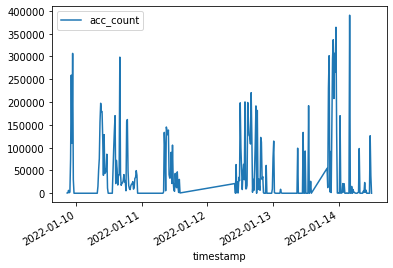

In [7]:
data.plot(x='timestamp', y='acc_count')

In [66]:
#separation of collected data in measurment 3 intervals 
#interval1 : "2022-01-09T20:45:01+01:00" - "2022-01-11T14:00:01+01:00"
interval_1=data[0:165]
#interval2: "2022-01-12T10:30:01+01:00" - "2022-01-13T14:00:01+01:00"
interval_2=data[166:278]
#interval3: "2022-01-13T19:45:01+01:00" - "2022-01-14T12:00:01+01:00"
interval_3=data[279:]

(array([299.,  26.,   9.,   7.,   3.]),
 array([0.00000000e+00, 9.04261970e+07, 1.80852394e+08, 2.71278591e+08,
        3.61704788e+08, 4.52130985e+08]),
 <a list of 5 Patch objects>)

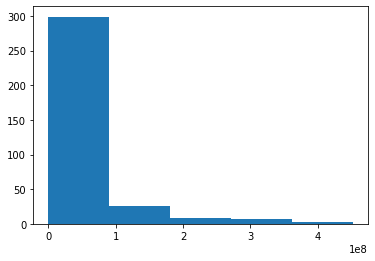

In [15]:
n_bins = 5
plt.pyplot.hist(data['acc_size'], bins=n_bins) #1*e8=10^8=100,000, 000  indicates an overall scale factor for the x-axis

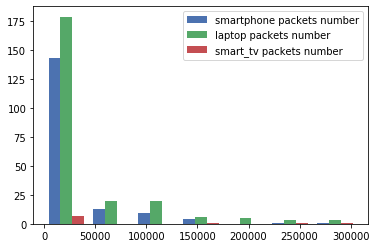

In [27]:
x=data['handy_total_count']
y=data['laptop_total_count']
z=data['tv_total_count']
plt.style.use('seaborn-deep')
bins=7
plt.pyplot.hist([x, y,z], bins, label=['smartphone packets number', 'laptop packets number','smart_tv packets number'])
plt.pyplot.legend(loc='upper right')
plt.pyplot.show()